In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [4]:
data = pd.read_csv("/content/network_data_collection.csv")

In [5]:
data = pd.DataFrame(data)

In [6]:
data.head(10)

,Time,result,table,_start,_stop,_time,_measurement,dst_ip,protocol,src_ip,...,packet_length_bytes,retransmission,session_duration_sec,tcp_dst_port,tcp_src_port,time_delta_ms,total_data_mb,ttl,window_size,tcp_flags
0,2024-12-01 06:02:46.585157+00:00,_result,0,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:02:46.585157+00:00,network_metrics,0,IAP,0,...,0.00,0,18.02,443.0,443.0,5.26,0.77,0.480315,0.007813,NaN
1,2024-12-01 06:03:07.283963+00:00,_result,1,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:03:07.283963+00:00,network_metrics,0,MDNS,0,...,0.01,0,20.48,443.0,443.0,112.30,1.45,0.480315,0.007645,NaN
2,2024-12-01 06:03:07.663857+00:00,_result,2,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:03:07.663857+00:00,network_metrics,134743044,TCP,2886800586,...,0.00,0,18.88,443.0,50625.0,0.13,7.25,0.500000,0.007782,0.636364
3,2024-12-01 06:02:47.347695+00:00,_result,3,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:02:47.347695+00:00,network_metrics,134743044,TLSv1.3,2886800586,...,0.03,0,19.41,443.0,50235.0,673.57,15.16,0.500000,0.007782,0.956522
4,2024-12-01 06:03:07.686791+00:00,_result,4,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:03:07.686791+00:00,network_metrics,134744072,DNS,2886800586,...,0.01,0,10.13,443.0,443.0,85.07,0.15,0.500000,0.007645,NaN
5,2024-12-01 06:02:47.371166+00:00,_result,5,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:02:47.371166+00:00,network_metrics,134744072,TCP,2886800586,...,0.00,0,3.57,443.0,50321.0,3.34,5.74,0.500000,0.980240,0.000000
6,2024-12-01 06:02:47.629368+00:00,_result,6,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:02:47.629368+00:00,network_metrics,1729119882,TCP,2886800586,...,0.00,0,1.08,443.0,50267.0,0.84,2.82,0.500000,0.980240,0.000000
7,2024-12-01 06:03:07.974591+00:00,_result,6,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:03:07.974591+00:00,network_metrics,1729119882,TCP,2886800586,...,0.00,0,0.18,443.0,50954.0,0.97,2.77,0.500000,0.980240,0.000000
8,2024-12-01 06:02:47.646294+00:00,_result,7,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:02:47.646294+00:00,network_metrics,1978658913,TCP,2886800586,...,0.00,0,0.02,443.0,64042.0,99.86,0.00,0.500000,0.015625,0.652174
9,2024-12-01 06:02:47.667130+00:00,_result,8,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:02:47.667130+00:00,network_metrics,1978658930,TCP,2886800586,...,0.00,0,1.04,443.0,50263.0,0.78,7.44,0.500000,0.980240,0.000000


In [7]:
data.isnull().sum()

,0
Time,0
result,0
table,0
_start,0
_stop,0
_time,0
_measurement,0
dst_ip,0
protocol,0
src_ip,0


In [7]:
data.columns

Index(['Time', 'result', 'table', '_start', '_stop', '_time', '_measurement',
       'dst_ip', 'protocol', 'src_ip', 'ack_rtt_ms', 'avg_latency_ms',
       'bandwidth_mbps', 'jitter_ms', 'packet_length_bytes', 'retransmission',
       'session_duration_sec', 'tcp_dst_port', 'tcp_src_port', 'time_delta_ms',
       'total_data_mb', 'ttl', 'window_size', 'tcp_flags'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27169 entries, 0 to 27168
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  27169 non-null  object 
 1   result                27169 non-null  object 
 2   table                 27169 non-null  int64  
 3   _start                27169 non-null  object 
 4   _stop                 27169 non-null  object 
 5   _time                 27169 non-null  object 
 6   _measurement          27169 non-null  object 
 7   dst_ip                27169 non-null  int64  
 8   protocol              27169 non-null  object 
 9   src_ip                27169 non-null  int64  
 10  ack_rtt_ms            27169 non-null  float64
 11  avg_latency_ms        27169 non-null  float64
 12  bandwidth_mbps        27169 non-null  float64
 13  jitter_ms             23006 non-null  float64
 14  packet_length_bytes   27169 non-null  float64
 15  retransmission     

In [9]:
data.isnull().sum()

,0
Time,0
result,0
table,0
_start,0
_stop,0
_time,0
_measurement,0
dst_ip,0
protocol,0
src_ip,0


In [8]:
data = data.dropna(subset=['src_ip', 'dst_ip'])
data['ack_rtt_ms'] = pd.to_numeric(data['ack_rtt_ms'], errors='coerce')
data['ttl'] = pd.to_numeric(data['ttl'], errors='coerce')
data['tcp_src_port'] = pd.to_numeric(data['tcp_src_port'], errors='coerce')
data['tcp_dst_port'] = pd.to_numeric(data['tcp_dst_port'], errors='coerce')
data['window_size'] = pd.to_numeric(data['window_size'], errors='coerce')
data['time_delta_ms'] = pd.to_numeric(data['time_delta_ms'], errors='coerce')
data['packet_length_bytes'] = pd.to_numeric(data['packet_length_bytes'], errors='coerce')
data['retransmission'] = pd.to_numeric(data['retransmission'], errors='coerce')
data['retransmission'] = data['retransmission'].notnull().astype(int)

In [11]:
data.isnull().sum()

,0
Time,0
result,0
table,0
_start,0
_stop,0
_time,0
_measurement,0
dst_ip,0
protocol,0
src_ip,0


In [9]:
mode_imputer = SimpleImputer(strategy='most_frequent')
data[['jitter_ms', 'tcp_flags']] = mode_imputer.fit_transform(
    data[['jitter_ms', 'tcp_flags']]
)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27169 entries, 0 to 27168
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  27169 non-null  object 
 1   result                27169 non-null  object 
 2   table                 27169 non-null  int64  
 3   _start                27169 non-null  object 
 4   _stop                 27169 non-null  object 
 5   _time                 27169 non-null  object 
 6   _measurement          27169 non-null  object 
 7   dst_ip                27169 non-null  int64  
 8   protocol              27169 non-null  object 
 9   src_ip                27169 non-null  int64  
 10  ack_rtt_ms            27169 non-null  float64
 11  avg_latency_ms        27169 non-null  float64
 12  bandwidth_mbps        27169 non-null  float64
 13  jitter_ms             27169 non-null  float64
 14  packet_length_bytes   27169 non-null  float64
 15  retransmission     

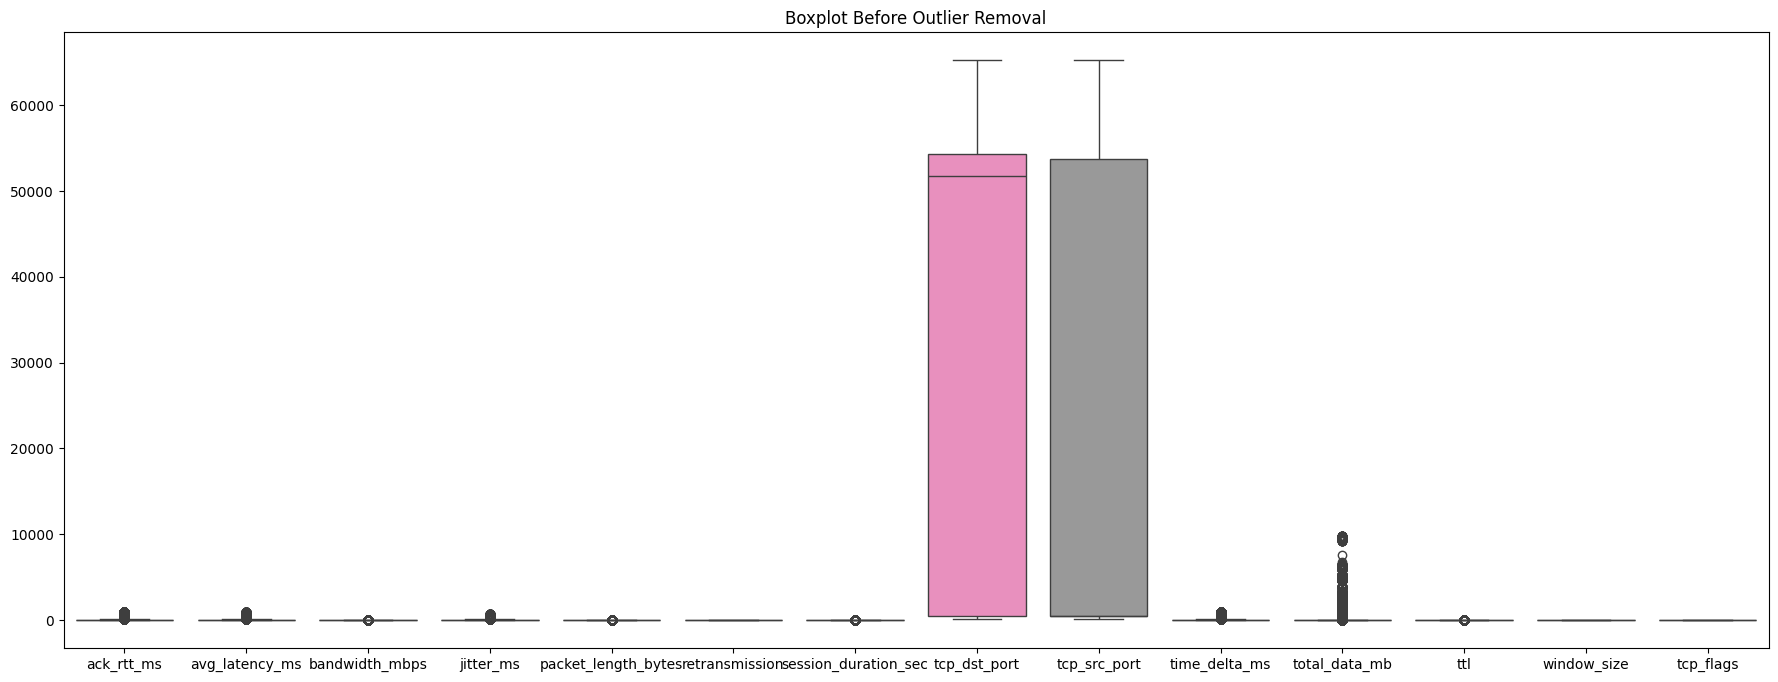

In [10]:
features = ['ack_rtt_ms', 'avg_latency_ms',
       'bandwidth_mbps', 'jitter_ms', 'packet_length_bytes', 'retransmission',
       'session_duration_sec', 'tcp_dst_port', 'tcp_src_port', 'time_delta_ms',
       'total_data_mb', 'ttl', 'window_size', 'tcp_flags']

plt.figure(figsize=(22, 8))
sns.boxplot(data=data[features], palette="Set1")
plt.title("Boxplot Before Outlier Removal")
plt.show()

In [34]:
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
df_cleaned = data[(z_scores < 10).all(axis=1)]

In [11]:
plt.figure(figsize=(22, 8))
sns.boxplot(data=df_cleaned[features], palette="Set2")
plt.title("Boxplot Before Outlier Removal")
plt.show()

NameError: name 'df_cleaned' is not defined

<Figure size 2200x800 with 0 Axes>

In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  0 non-null      object 
 1   result                0 non-null      object 
 2   table                 0 non-null      int64  
 3   _start                0 non-null      object 
 4   _stop                 0 non-null      object 
 5   _time                 0 non-null      object 
 6   _measurement          0 non-null      object 
 7   dst_ip                0 non-null      int64  
 8   protocol              0 non-null      object 
 9   src_ip                0 non-null      int64  
 10  ack_rtt_ms            0 non-null      float64
 11  avg_latency_ms        0 non-null      float64
 12  bandwidth_mbps        0 non-null      float64
 13  jitter_ms             0 non-null      float64
 14  packet_length_bytes   0 non-null      float64
 15  retransmission        0 non-null      in

In [12]:
data2 = data.select_dtypes(include=['number'])

Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = data2[~((data2 < (Q1 - 1.5 * IQR)) | (data2 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [40]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10804 entries, 5 to 27167
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   table                 10804 non-null  int64  
 1   dst_ip                10804 non-null  int64  
 2   src_ip                10804 non-null  int64  
 3   ack_rtt_ms            10804 non-null  float64
 4   avg_latency_ms        10804 non-null  float64
 5   bandwidth_mbps        10804 non-null  float64
 6   jitter_ms             10804 non-null  float64
 7   packet_length_bytes   10804 non-null  float64
 8   retransmission        10804 non-null  int64  
 9   session_duration_sec  10804 non-null  float64
 10  tcp_dst_port          10804 non-null  float64
 11  tcp_src_port          10804 non-null  float64
 12  time_delta_ms         10804 non-null  float64
 13  total_data_mb         10804 non-null  float64
 14  ttl                   10804 non-null  float64
 15  window_size           10

In [13]:
#rom sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(df_cleaned.select_dtypes(include=[np.number])),
                                columns=df_cleaned.select_dtypes(include=[np.number]).columns)

In [14]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10804 entries, 0 to 10803
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   table                 10804 non-null  float64
 1   dst_ip                10804 non-null  float64
 2   src_ip                10804 non-null  float64
 3   ack_rtt_ms            10804 non-null  float64
 4   avg_latency_ms        10804 non-null  float64
 5   bandwidth_mbps        10804 non-null  float64
 6   jitter_ms             10804 non-null  float64
 7   packet_length_bytes   10804 non-null  float64
 8   retransmission        10804 non-null  float64
 9   session_duration_sec  10804 non-null  float64
 10  tcp_dst_port          10804 non-null  float64
 11  tcp_src_port          10804 non-null  float64
 12  time_delta_ms         10804 non-null  float64
 13  total_data_mb         10804 non-null  float64
 14  ttl                   10804 non-null  float64
 15  window_size        

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(normalized_data)

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Check explained variance
print(f"Explained variance by components: {pca.explained_variance_ratio_}")


Explained variance by components: [0.29195666 0.1764733 ]


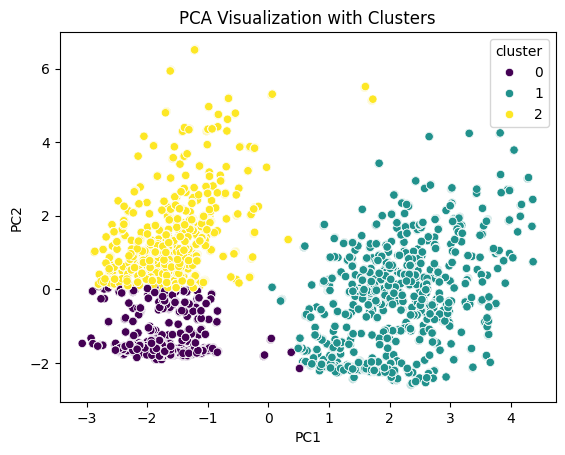

In [18]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='cluster', palette='viridis')
plt.title('PCA Visualization with Clusters')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

score = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5001603927018732


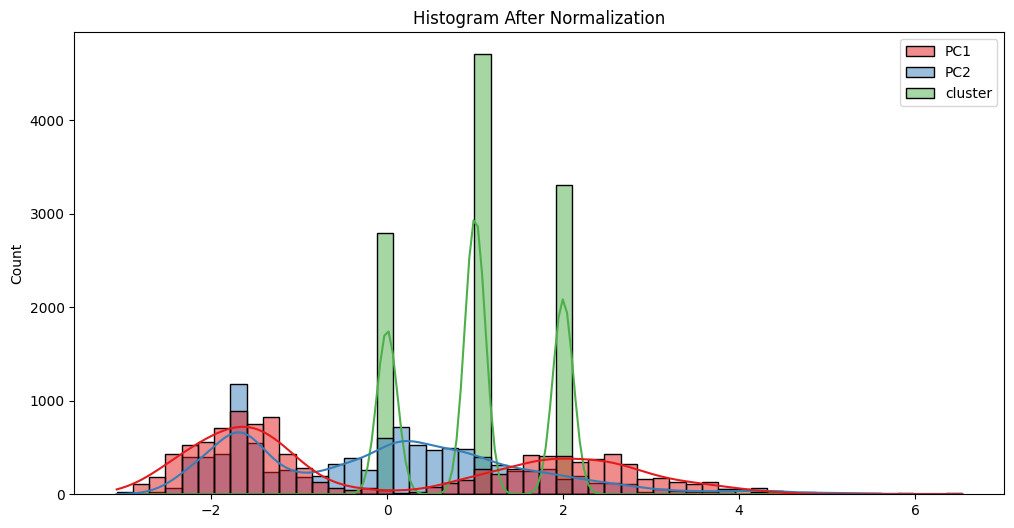

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(pca_df, kde=True, palette="Set1")
plt.title("Histogram After Normalization")
plt.show()

### Time for ML Model Training

In [21]:
from sklearn.ensemble import IsolationForest
import numpy as np


def train_isolation_forest(data, contamination=0.1):

    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(data[['PC1', 'PC2']])
    labels = model.predict(data[['PC1', 'PC2']])


    data['network_condition'] = np.where(labels == 1, 'Good', 'Critical')
    data.loc[labels == -1, 'network_condition'] = 'Critical'

    return model, data

iso_model, pca_df = train_isolation_forest(pca_df)
print(pca_df['network_condition'].value_counts())

network_condition
Good        9723
Critical    1081
Name: count, dtype: int64


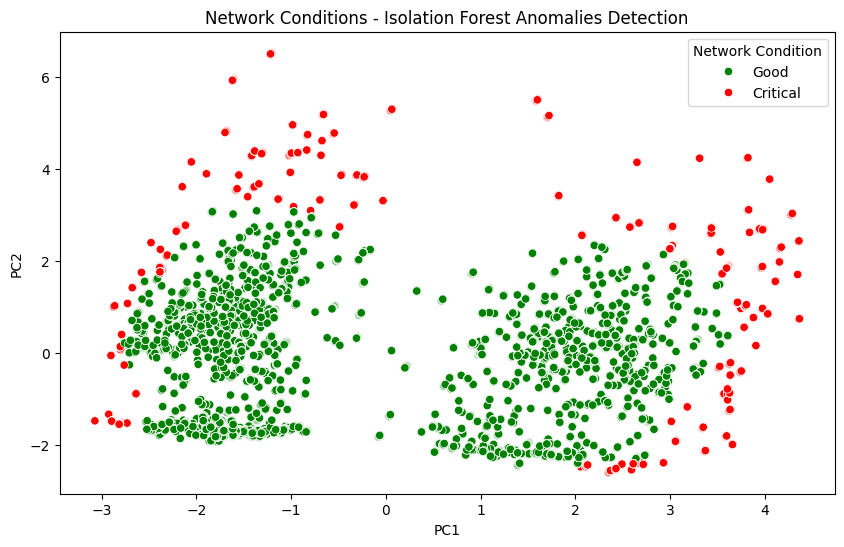

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='network_condition', data=pca_df, palette=['green', 'red'])
plt.title('Network Conditions - Isolation Forest Anomalies Detection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Network Condition')

In [23]:
pca_df['network_condition_num'] = pca_df['network_condition'].map({'Good': 1, 'Critical': -1})


valid_data = pca_df[['PC1', 'PC2']]
sil_score = silhouette_score(valid_data, pca_df['network_condition_num'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.2982333769066467


In [24]:
from sklearn.svm import OneClassSVM

def train_one_class_svm(data, nu=0.05, kernel='rbf'):

    model = OneClassSVM(nu=nu, kernel=kernel, gamma='scale')
    model.fit(data[['PC1', 'PC2']])
    labels = model.predict(data[['PC1', 'PC2']])


    data['condition'] = np.where(labels == 1, 'Normal', 'Anomaly')
    return model, data

svm_model, pca_df = train_one_class_svm(pca_df)
print(pca_df['condition'].value_counts())

condition
Normal     10260
Anomaly      544
Name: count, dtype: int64


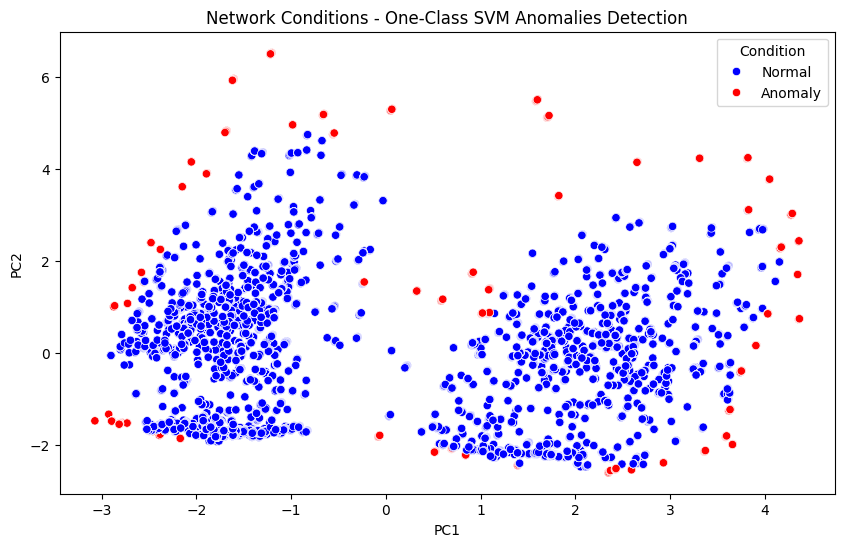

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='condition', data=pca_df, palette=['blue', 'red'])
plt.title('Network Conditions - One-Class SVM Anomalies Detection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Condition')
plt.show()

In [26]:
pca_df['condition_num'] = pca_df['condition'].map({'Normal': 1, 'Anomaly': -1})

# Silhouette score for anomaly detection
valid_data = pca_df[['PC1', 'PC2']]
sil_score = silhouette_score(valid_data, pca_df['condition_num'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.26351219619501715


In [37]:
data_filtered = data.iloc[pca_df.index]  # Keep only rows corresponding to pca_df

# Now add the 'avg_latency_ms' column
pca_df['avg_latency_ms'] = data_filtered['avg_latency_ms'].values

Epoch [1/5], Train Loss: 0.9987, Val Loss: 1.0053
Epoch [2/5], Train Loss: 0.9981, Val Loss: 1.0059
Epoch [3/5], Train Loss: 0.9995, Val Loss: 1.0053
Epoch [4/5], Train Loss: 0.9984, Val Loss: 1.0053
Epoch [5/5], Train Loss: 0.9988, Val Loss: 1.0055


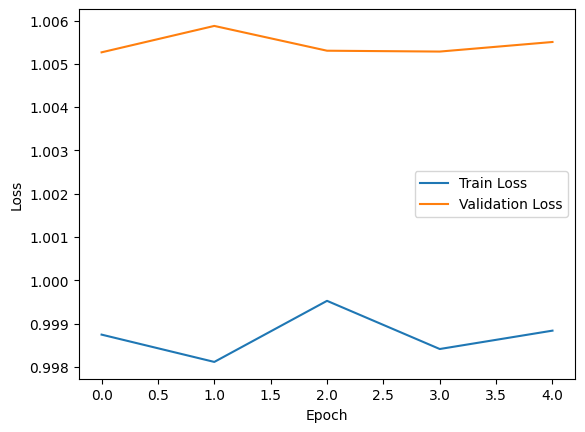

In [43]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dataset Preparation
class LatencyDataset(Dataset):
    def __init__(self, data, labels, seq_length=10):
        self.data = data
        self.seq_length = seq_length
        self.labels = labels

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_length]
        y = self.labels[idx + self.seq_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Define the LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout=0.3):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Only take the last output
        return out

# Hyperparameters
input_dim = 2  # PC1 and PC2
hidden_dim = 256
num_layers = 2
output_dim = 1
learning_rate = 0.0005  # Reduced learning rate for better convergence
epochs = 5
seq_length = 10

# Data Preparation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_df[['PC1', 'PC2']].values)  # Scale PC1 and PC2
y_scaled = scaler.fit_transform(pca_df['avg_latency_ms'].values.reshape(-1, 1)).flatten()  # Scale avg_latency_ms

# Split data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

train_dataset = LatencyDataset(X_train, y_train, seq_length=seq_length)
val_dataset = LatencyDataset(X_val, y_val, seq_length=seq_length)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Initialize Model, Loss, and Optimizer
model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout=0.3)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

# Training Loop
loss_values, val_loss_values = [], []
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for x, y in train_loader:
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs.squeeze(), y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        epoch_loss += loss.item()
    scheduler.step()  # Adjust learning rate

    # Validation Loss
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in val_loader:
            outputs = model(x)
            val_loss += criterion(outputs.squeeze(), y).item()
    val_loss /= len(val_loader)
    val_loss_values.append(val_loss)

    epoch_loss /= len(train_loader)
    loss_values.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")



plt.plot(loss_values, label='Train Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
data.columns

Index(['Time', 'result', 'table', '_start', '_stop', '_time', '_measurement',
       'dst_ip', 'protocol', 'src_ip', 'ack_rtt_ms', 'avg_latency_ms',
       'bandwidth_mbps', 'jitter_ms', 'packet_length_bytes', 'retransmission',
       'session_duration_sec', 'tcp_dst_port', 'tcp_src_port', 'time_delta_ms',
       'total_data_mb', 'ttl', 'window_size', 'tcp_flags'],
      dtype='object')

In [32]:
if 'avg_latency_ms' in data.columns:
    print(data['avg_latency_ms'].head())
else:
    print("Column 'avg_latency_ms' does not exist!")

0    159.74
1    138.60
2      3.20
3     19.30
4     29.76
Name: avg_latency_ms, dtype: float64
